In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
import math

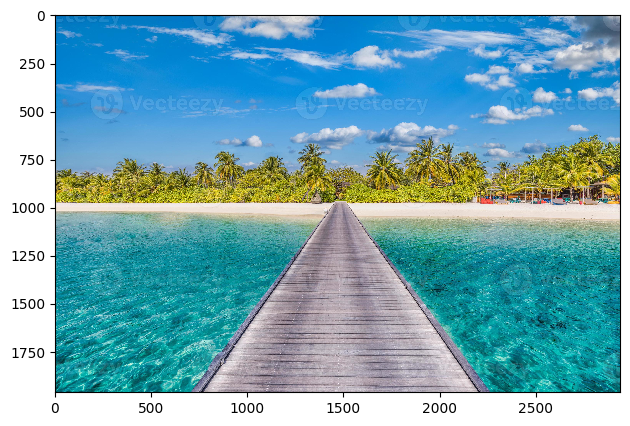

In [ ]:
im1 = imread('/content/plage_tropicale.jpg')
imshow(im1)

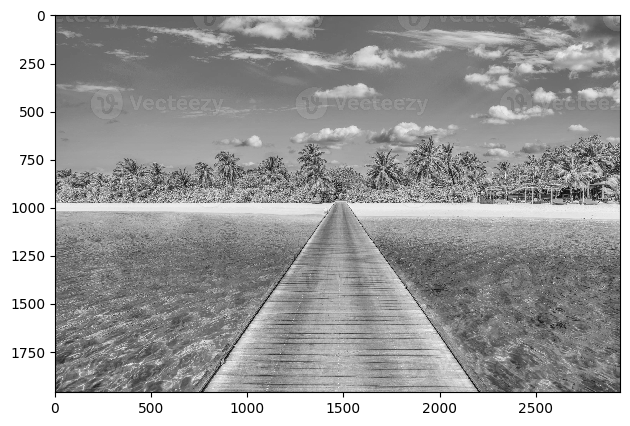

In [ ]:
im1_gray = imread('/content/plage_tropicale.jpg', as_gray=True)
imshow(im1_gray)

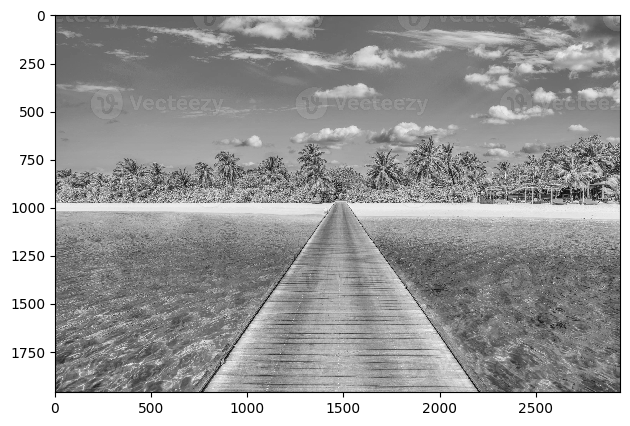

In [ ]:
im1_gray2 = rgb2gray(im1)
imshow(im1_gray2)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


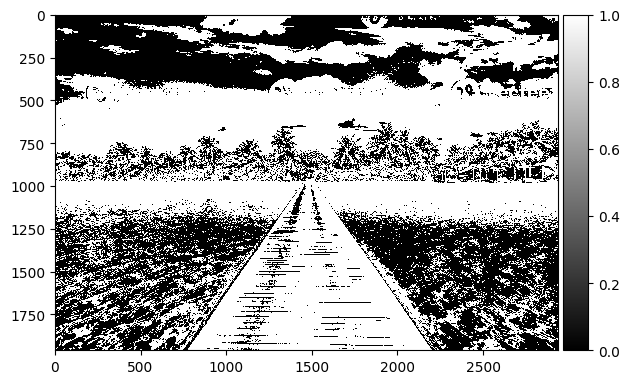

In [ ]:
im1 = imread('/content/plage_tropicale.jpg')

im_bw = np.where(im1_gray > 128/255, 1, 0)
imshow(im_bw, cmap = plt.get_cmap('gray'))

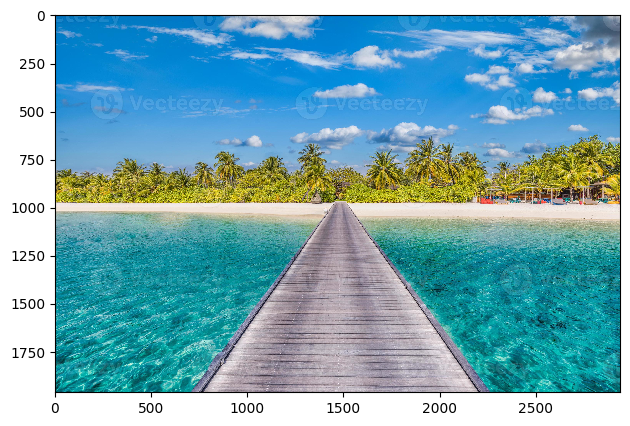

In [ ]:
imshow(im1)

In [ ]:
def img_hist(img):
  _, axis = plt.subplots(ncols=2, figsize=(12, 3))
  if img.ndim == 2:
    axis[0].imshow(img, cmap=plt.get_cmap('gray'))
    axis[1].set_title('Histogram')
    axis[0].set_title('Grayscale Image')
    hist = exposure.histogram(img)
    axis[1].plot(hist[0])
  else:
    axis[0].imshow(img, cmap='gray')
    axis[1].set_title('Histogram')
    axis[0].set_title('Color Image')
    rgbcolors = ['red', 'green', 'blue']
    for i, mycolor in enumerate(rgbcolors):
      axis[1].plot(exposure.histogram(img[...,i])[0], color=mycolor)

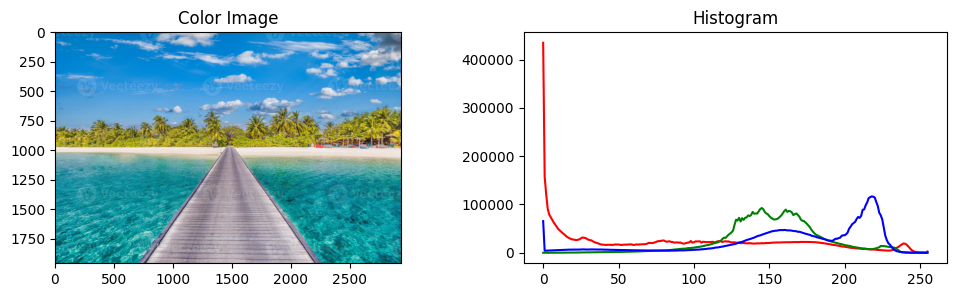

In [ ]:
img_hist(im1)

In [ ]:
import cv2

def hist_openCV(_img):
  _, axis = plt.subplots(ncols = 2, figsize = (12, 3))
  axis[0].imshow(_img)
  axis[1].set_title('Histogram')
  axis[0].set_title('Image')
  colors = ['red', 'green', 'blue']
  for i, col in enumerate(colors):
    histr = cv2.calcHist([_img], [i], None, [256], [0, 256])
    axis[1].plot(histr, color=col)

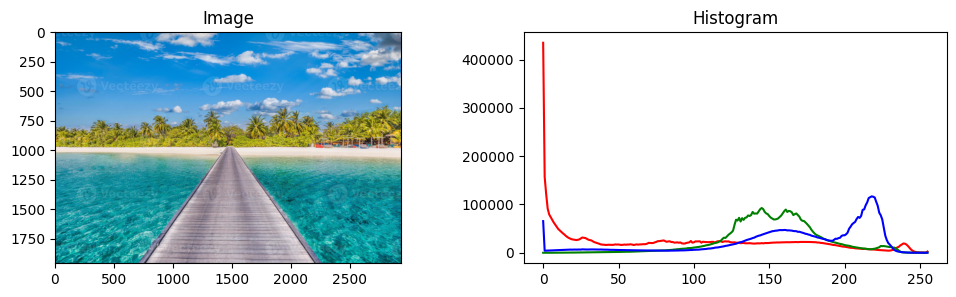

In [ ]:
hist_openCV(im1)

# Seuillage

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
from skimage.filters import threshold_mean, threshold_otsu


In [ ]:
img = imread('/content/coucher_de_soleil.jpeg', as_gray=True)

In [ ]:
def hist_gray(img, _xlim=255, _ylim = 2400):
  _, axes = plt.subplots(ncols=2, figsize=(12,3))
  ax = axes.ravel()
  ax[0].imshow(img, cmap=plt.get_cmap('gray'))
  ax[1].set_title('Histogram')
  ax[0].set_title('Gray image')
  hist = exposure.histogram(img)
  ax[1].plot(hist[0])
  ax[1].set_xlim([0, _xlim])
  ax[1].set_ylim([0, _ylim])

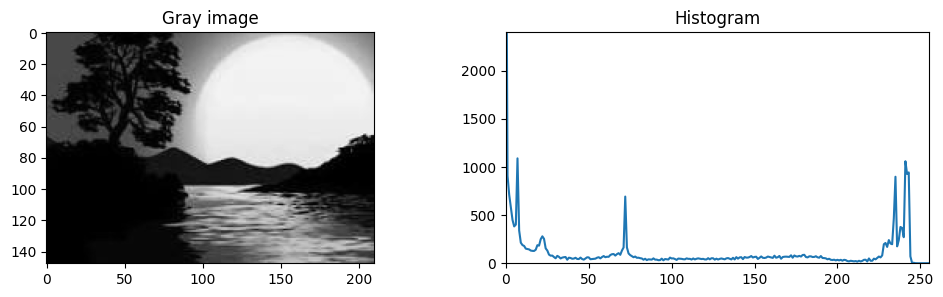

In [ ]:
hist_gray(img)

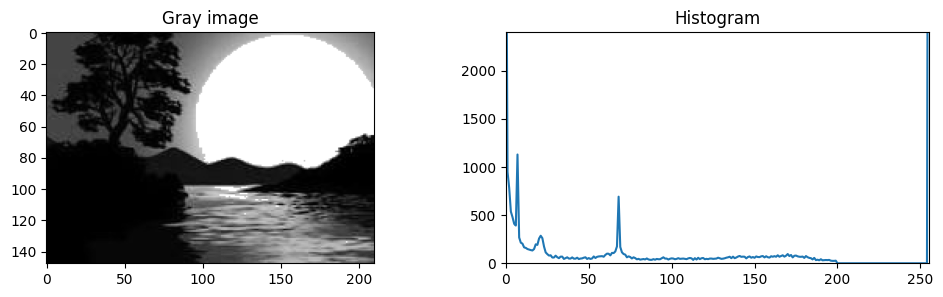

In [ ]:
im = np.where(img > 200/256, 1, img)
hist_gray(im)

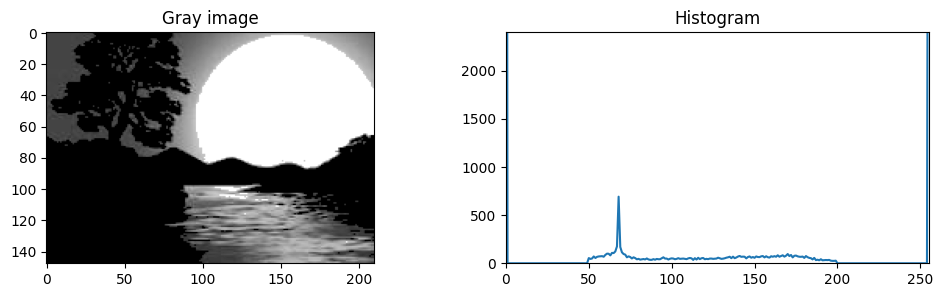

In [ ]:
imm = np.where(im < 50/256, 0, im)
hist_gray(imm)

In [ ]:
def StatsImg(image):
  colors = []
  for i in range(0, 3):
    min = np.min(image[:, :, i])
    max = np.max(image[:, :, i])
    moy = np.mean(image[:, :, i])
    median = np.median(image[:, :, i])
    row = (min, max, moy, median)
    colors.append(row)
    return pd.DataFrame(colors, index = ['Red', 'Green', 'Blue'], columns = ['Min', 'Max', 'Moyenne', 'Médian'])

In [ ]:
StatsImg(im1)

Min  Max    Moyenne  Médian
Red      0  255  88.513689    82.0
Green    0  255  88.513689    82.0
Blue     0  255  88.513689    82.0

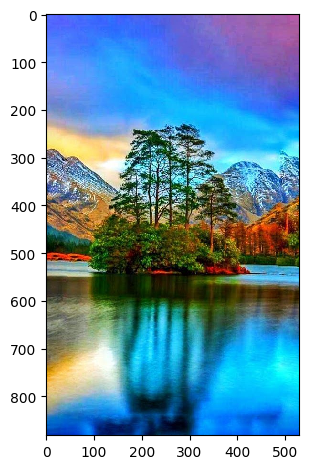

In [ ]:
im3 = imread('/content/arbre.jpg')
imshow(im3)

In [ ]:
im1_rotated = transform.rotate(im1, angle=180, preserve_range=True)
print(im1_rotated)

[[[ 11. 126. 129.]
  [  9. 124. 127.]
  [ 10. 122. 126.]
  ...
  [  0.  90.  96.]
  [  0.  95. 100.]
  [  6. 109. 114.]]

 [[ 13. 128. 131.]
  [ 12. 127. 130.]
  [ 13. 125. 129.]
  ...
  [  0.  99. 103.]
  [  0. 107. 110.]
  [ 14. 123. 126.]]

 [[ 15. 130. 133.]
  [ 15. 130. 133.]
  [ 17. 129. 133.]
  ...
  [  2. 118. 118.]
  [  8. 128. 127.]
  [ 25. 145. 144.]]

 ...

 [[209. 205. 202.]
  [209. 205. 202.]
  [208. 204. 201.]
  ...
  [ 25. 127. 193.]
  [ 28. 127. 194.]
  [ 27. 126. 193.]]

 [[217. 214. 209.]
  [217. 213. 210.]
  [216. 212. 209.]
  ...
  [ 25. 127. 193.]
  [ 29. 128. 195.]
  [ 28. 127. 194.]]

 [[221. 218. 213.]
  [221. 217. 214.]
  [221. 217. 214.]
  ...
  [ 25. 127. 193.]
  [ 29. 128. 195.]
  [ 28. 127. 194.]]]


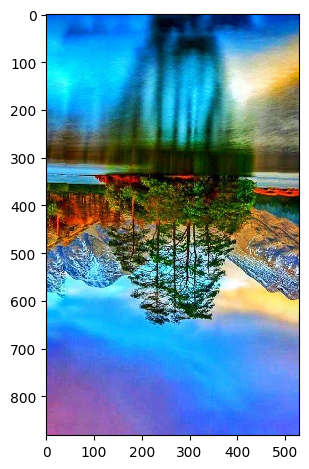

In [ ]:
im3_normalized = im3/255

im3_rotated_normalized = transform.rotate(im3_normalized, angle=180, preserve_range=True)
im3_rotated = (im3_rotated_normalized*255).astype(np.uint8)

imshow(im3_rotated)

Text(0.5, 1.0, 'Image retournée')

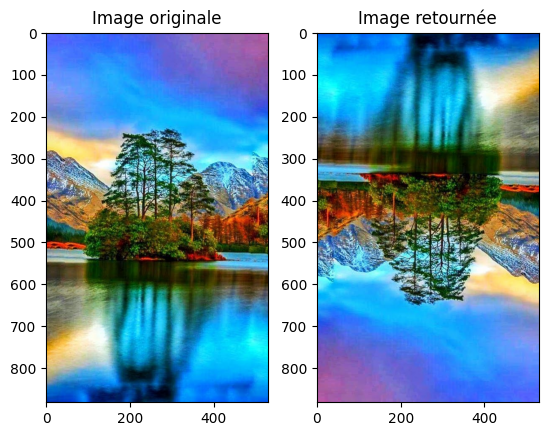

In [ ]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(im3, cmap=plt.get_cmap('gray'))
axes[0].set_title('Image originale')
axes[1].imshow(im3_rotated, cmap=plt.get_cmap('gray'))
axes[1].set_title('Image retournée')

In [ ]:
im3.shape

(882, 530, 3)

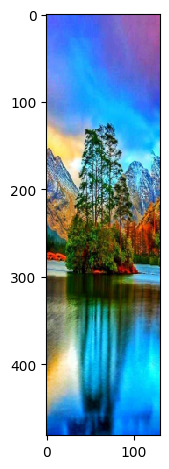

In [ ]:
im_resized = transform.resize(image=im3, output_shape=(482, 130))
imshow(im_resized)